### LEADERSHIP SKILLS (MSCA 31003)

#### File: Assignment6

#### Description: Modeling Assignment

#### Author: Jacqueline Pezan

#### Date: 12/04/2021

#### Project Overview: 
Predict if a passenger survived in the Titanic or not.

#### Instructions to get full credit:
- Understand the problem (2-3 lines)

Summary: Use machine learning algorithms and variables provided, to predict if a passanger survived the Titanic. Variables will be trained and tested against the parameter "Survived."

In [1]:
import pandas as pd

- Show any data cleaning that needs to be done prior to analysis

In [2]:
file_to_load = "titanic.csv"
titanic_df = pd.read_csv(file_to_load)
titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


- Exploratory data analysis (EDA)

/Users/jackiepezan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

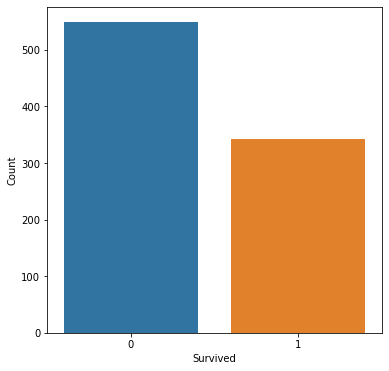

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
sns.countplot(titanic_df['Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')

- Check the completeness of the data

In [4]:
# Check for NaN values
titanic_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

- Feature engineering

#### Logistic Regression

- Train-Test split (Feel free to choose the split)

In [13]:
X = titanic_df.loc[:, ['Pclass','SibSp', 'Parch']]

In [6]:
y = titanic_df['Survived']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
print("\nConfusion Matrix for Logistic Regression Model:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model:\n\n", classification_report(y_test, y_pred_lr))


Confusion Matrix for Logistic Regression Model:

 [[179  37]
 [ 68  73]]

Classification Report for Logistic Regression Model:

               precision    recall  f1-score   support

           0       0.72      0.83      0.77       216
           1       0.66      0.52      0.58       141

    accuracy                           0.71       357
   macro avg       0.69      0.67      0.68       357
weighted avg       0.70      0.71      0.70       357



- Apply 3 supervised learning algorithms (You can apply more if you’re not satisfied with results)
- Make sure you standardize the features before fitting the models

#### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [13]:
print("\nConfusion Matrix for Random Forest Model:\n\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model:\n\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model:

 [[173  43]
 [ 71  70]]

Classification Report for Random Forest Model:

               precision    recall  f1-score   support

           0       0.71      0.80      0.75       216
           1       0.62      0.50      0.55       141

    accuracy                           0.68       357
   macro avg       0.66      0.65      0.65       357
weighted avg       0.67      0.68      0.67       357



#### Gradient Boost Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = lr.predict(X_test_scaled)

In [22]:
print("\nConfusion Matrix for Gradient Boosting Classifier:\n\n", confusion_matrix(y_test, y_pred_gbc))
print("\nClassification Report for Gradient Boosting Classifier:\n\n", classification_report(y_test, y_pred_gbc))


Confusion Matrix for Gradient Boosting Classifier:

 [[179  37]
 [ 68  73]]

Classification Report for Gradient Boosting Classifier:

               precision    recall  f1-score   support

           0       0.72      0.83      0.77       216
           1       0.66      0.52      0.58       141

    accuracy                           0.71       357
   macro avg       0.69      0.67      0.68       357
weighted avg       0.70      0.71      0.70       357



#### Desicion Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = GradientBoostingClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = lr.predict(X_test_scaled)

In [25]:
print("\nConfusion Matrix for Desicion Tree Classifier:\n\n", confusion_matrix(y_test, y_pred_dtc))
print("\nClassification Report for Desicion Tree Classifier:\n\n", classification_report(y_test, y_pred_dtc))


Confusion Matrix for Desicion Tree Classifier:

 [[179  37]
 [ 68  73]]

Classification Report for Desicion Tree Classifier:

               precision    recall  f1-score   support

           0       0.72      0.83      0.77       216
           1       0.66      0.52      0.58       141

    accuracy                           0.71       357
   macro avg       0.69      0.67      0.68       357
weighted avg       0.70      0.71      0.70       357



- Calculate 3 metrics to evaluate each of the classification algorithms: 

- Which is your best performing model. Explain. 

- Approach for deploying the model into production (Theoretical)